In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #adjusts the configuration of the plots

#read in the data
 
df = pd.read_csv("/Users/yoseff/downloads/movies.csv")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [44]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,1980-06-13,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,1980-07-02,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,1980-06-20,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,1980-07-02,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,1980-07-25,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,1980-05-09,6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,1980-06-20,7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,1980-12-19,8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,1981-06-19,6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,1980-05-16,7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [18]:
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))
    
df.dtypes


name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [15]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [49]:
#create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,23,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,23
1,5573,6,1,1980,27,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,27
2,5142,4,0,1980,24,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,24
3,286,4,4,1980,27,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,27
4,1027,6,4,1980,31,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,31
5,2109,6,10,1980,17,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0,17
6,5574,6,0,1980,24,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0,24
7,4436,6,3,1980,48,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0,48
8,5281,4,0,1980,73,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0,73
9,6213,6,3,1980,18,7.0,10000.0,2864,423,589,55,10000000.0,15795189.0,2272,100.0,18


In [46]:
df.sort_values(by=['gross'], inplace = False, ascending = False)

pd.set_option('display.max_rows', None)

<function matplotlib.pyplot.show(close=None, block=None)>

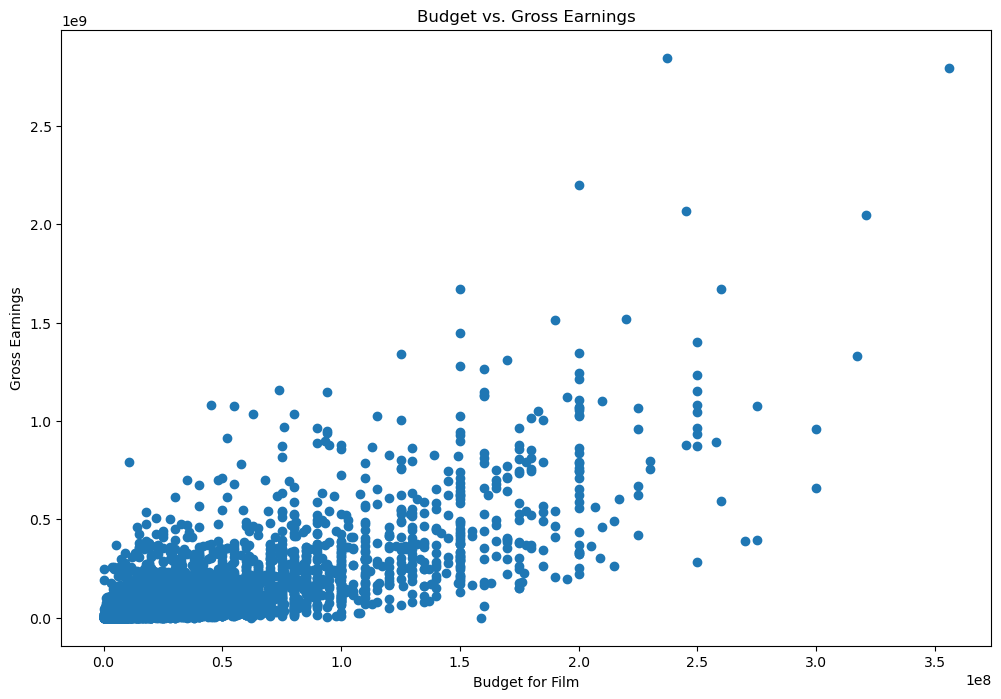

In [30]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

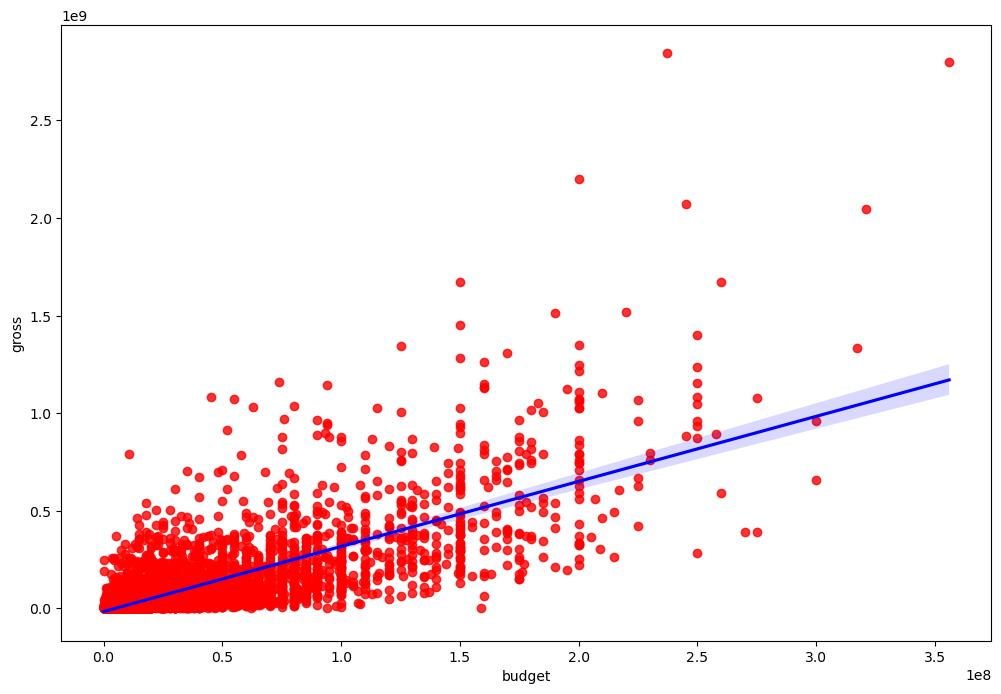

In [32]:
#plot the budget vs gross using seaborn regression plot

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [33]:
df.corr(method = 'pearson')

/var/folders/n0/l3mnbs355vv437zzwqt4cx6r0000gn/T/ipykernel_45129/3294333281.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method = 'pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


/var/folders/n0/l3mnbs355vv437zzwqt4cx6r0000gn/T/ipykernel_45129/1779274836.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method = 'pearson')


<function matplotlib.pyplot.show(close=None, block=None)>

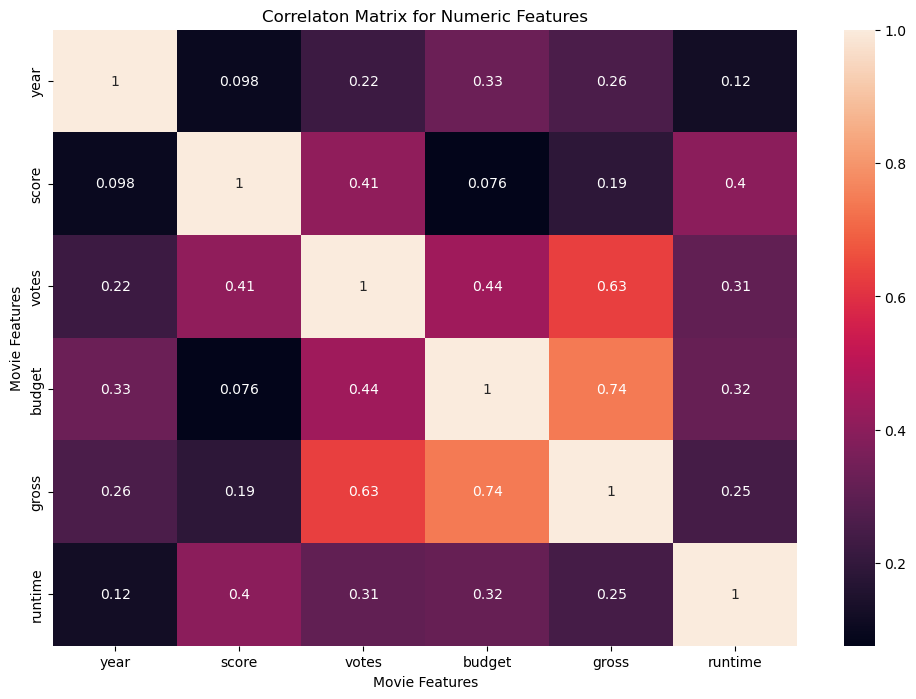

In [35]:
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlaton Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [50]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,23,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,1447
1,5573,6,1,1980,27,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,1891
2,5142,4,0,1980,24,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,1558
3,286,4,4,1980,27,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,1891
4,1027,6,4,1980,31,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,2183
5,2109,6,10,1980,17,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0,780
6,5574,6,0,1980,24,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0,1558
7,4436,6,3,1980,48,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0,2371
8,5281,4,0,1980,73,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0,2649
9,6213,6,3,1980,18,7.0,10000.0,2864,423,589,55,10000000.0,15795189.0,2272,100.0,891


<function matplotlib.pyplot.show(close=None, block=None)>

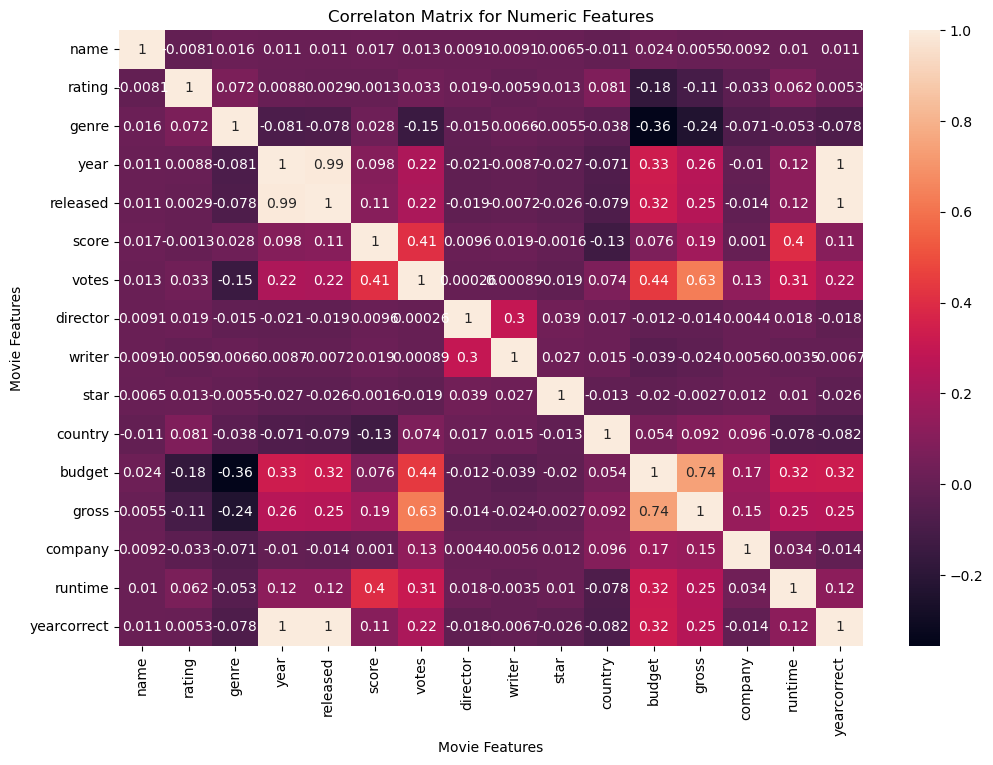

In [37]:
correlation_matrix = df_numerized.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlaton Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [38]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,0.010638,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.023970,0.005533,0.009211,0.010392,0.010855
rating,-0.008069,1.000000,0.072423,0.008779,0.002940,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.176002,-0.107339,-0.032943,0.062145,0.005271
genre,0.016355,0.072423,1.000000,-0.081261,-0.078489,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.356564,-0.235650,-0.071067,-0.052711,-0.078472
year,0.011453,0.008779,-0.081261,1.000000,0.994382,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.329321,0.257486,-0.010431,0.120811,0.995138
released,0.010638,0.002940,-0.078489,0.994382,1.000000,0.108749,0.218205,-0.019279,-0.007182,-0.025901,-0.079154,0.322776,0.252665,-0.013838,0.124236,0.997463
score,0.017097,-0.001314,0.027965,0.097995,0.108749,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.076254,0.186258,0.001030,0.399451,0.106697
votes,0.013088,0.033225,-0.145307,0.222945,0.218205,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.442429,0.630757,0.133204,0.309212,0.218510
director,0.009079,0.019483,-0.015258,-0.020795,-0.019279,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.012272,-0.014441,0.004404,0.017624,-0.018275
writer,0.009081,-0.005921,0.006567,-0.008656,-0.007182,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.039451,-0.023519,0.005646,-0.003511,-0.006737
star,0.006472,0.013405,-0.005477,-0.027242,-0.025901,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019589,-0.002717,0.012442,0.010174,-0.026002


In [48]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released    0.010638
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.002940
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [40]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.356564
genre        budget        -0.356564
             gross         -0.235650
gross        genre         -0.235650
rating       budget        -0.176002
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [41]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.630757
votes        gross          0.630757
gross        budget         0.740395
budget       gross          0.740395
released     year           0.994382
year         released       0.994382
             yearcorrect    0.995138
yearcorrect  year           0.995138
released     yearcorrect    0.997463
yearcorrect  released       0.997463
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and budget have the highest correlation to gross earnings.
#company has low correlation to success of movie